# Modelo de regressão linear ações do banco Itaú.

**Previsão com as melhores ações para comprar usando modelo de regressão linear.**

**Algoritmos** Floresta randômica.

**Regressão linear**: RMSE, MAE, MSE.

**Analise exploratória de dados**:
Analise das ações com graficos boxplot

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
dados = pd.read_csv("Dados\ITUB4.SA.csv")
dfr = pd.read_csv("Dados\ITUB.csv")
dados.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-04-24,34.266701,34.393299,33.653301,33.820000,31.625109,12123900.0
1,2018-04-25,33.480000,33.826698,33.293301,33.619999,31.438080,14208600.0
2,2018-04-26,33.919998,34.513302,33.833302,34.400002,32.167477,14530650.0
3,2018-04-27,34.613300,34.733299,34.200001,34.333302,32.105106,13620900.0
4,2018-04-30,34.340000,34.486698,33.779999,34.006699,31.799690,9489750.0


In [3]:
dfr.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-05,7.406061,7.606061,7.363636,7.527273,5.787374,12836500
1,2015-01-06,7.636364,7.836364,7.521212,7.769697,5.973759,23884900
2,2015-01-07,8.066667,8.145454,7.957576,7.987879,6.141512,13858500
3,2015-01-08,8.024242,8.266666,7.987879,8.169697,6.281302,24868500
4,2015-01-09,8.121212,8.193939,7.927273,7.969697,6.127534,12914800


In [4]:
dados.shape

(494, 7)

In [5]:
dados.columns = ["Data", "Aberta", "Alta", "Baixa", "Fechada", "Adj Fechar", "Volume"]
dados.head()

,Data,Aberta,Alta,Baixa,Fechada,Adj Fechar,Volume
0,2018-04-24,34.266701,34.393299,33.653301,33.820000,31.625109,12123900.0
1,2018-04-25,33.480000,33.826698,33.293301,33.619999,31.438080,14208600.0
2,2018-04-26,33.919998,34.513302,33.833302,34.400002,32.167477,14530650.0
3,2018-04-27,34.613300,34.733299,34.200001,34.333302,32.105106,13620900.0
4,2018-04-30,34.340000,34.486698,33.779999,34.006699,31.799690,9489750.0


In [6]:
dados.tail()

,Data,Aberta,Alta,Baixa,Fechada,Adj Fechar,Volume
489,2020-04-16,23.700001,23.820000,22.799999,22.809999,22.809999,31071300.0
490,2020-04-17,23.440001,23.610001,22.610001,23.219999,23.219999,25164100.0
491,2020-04-20,22.719999,22.969999,22.500000,22.639999,22.639999,28583800.0
492,2020-04-22,22.400000,23.129999,22.209999,22.370001,22.370001,48051200.0
493,2020-04-23,22.660000,22.740000,21.840000,22.049999,22.049999,41455100.0


In [7]:
dfr.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-05,7.406061,7.606061,7.363636,7.527273,5.787374,12836500
1,2015-01-06,7.636364,7.836364,7.521212,7.769697,5.973759,23884900
2,2015-01-07,8.066667,8.145454,7.957576,7.987879,6.141512,13858500
3,2015-01-08,8.024242,8.266666,7.987879,8.169697,6.281302,24868500
4,2015-01-09,8.121212,8.193939,7.927273,7.969697,6.127534,12914800


In [8]:
dfr.columns = ["Data", "Aberta", "Alta", "Baixa", "Fechada", "Adj Fechar", "Volume"]
dfr.head()

,Data,Aberta,Alta,Baixa,Fechada,Adj Fechar,Volume
0,2015-01-05,7.406061,7.606061,7.363636,7.527273,5.787374,12836500
1,2015-01-06,7.636364,7.836364,7.521212,7.769697,5.973759,23884900
2,2015-01-07,8.066667,8.145454,7.957576,7.987879,6.141512,13858500
3,2015-01-08,8.024242,8.266666,7.987879,8.169697,6.281302,24868500
4,2015-01-09,8.121212,8.193939,7.927273,7.969697,6.127534,12914800


In [9]:
dfr.tail()

,Data,Aberta,Alta,Baixa,Fechada,Adj Fechar,Volume
1373,2020-06-18,5.00,5.24,4.99,5.09,5.09,36229200
1374,2020-06-19,5.24,5.30,5.12,5.27,5.27,39647900
1375,2020-06-22,5.34,5.37,5.09,5.15,5.15,19357700
1376,2020-06-23,5.21,5.35,5.14,5.23,5.23,31066600
1377,2020-06-24,5.10,5.10,4.81,4.84,4.84,52922600


# Estátistica

In [10]:
dados.describe()

,Aberta,Alta,Baixa,Fechada,Adj Fechar,Volume
count,492.000000,492.000000,492.000000,492.000000,492.000000,4.920000e+02
mean,32.924851,33.328265,32.457818,32.887236,31.638127,2.336833e+07
std,3.856710,3.803162,3.922886,3.884145,3.829256,1.214425e+07
min,21.379999,21.480000,20.000000,20.520000,20.506670,6.474900e+06
25%,30.796674,31.224974,30.441651,30.765024,28.904323,1.584626e+07
50%,33.948351,34.320000,33.524999,33.943350,32.815721,1.994020e+07
75%,35.604998,36.119999,35.194999,35.627500,34.674417,2.695256e+07
max,38.669998,39.790001,38.400002,39.689999,37.477531,9.551390e+07


**Média**

In [11]:
print("Media da ação alta:",dados["Alta"].mean())

Media da ação alta: 33.32826510365857


In [12]:
print("Media da ação baixa:", dados["Baixa"].mean())

Media da ação baixa: 32.457817886178866


In [13]:
print("Media da ação fechada:", dados["Fechada"].mean())

Media da ação fechada: 32.887235786585386


**Médiana**

In [14]:
print("Mediana da ação alta", dados["Alta"].median())

Mediana da ação alta 34.32


In [15]:
print("Mediana da ação baixa:", dados["Baixa"].median())

Mediana da ação baixa: 33.5249995


In [16]:
print("Mediana da ação fechada:",dados["Fechada"].median())

Mediana da ação fechada: 33.94335


**Moda**

In [17]:
print("Moda da ação alta", dados["Alta"].mode())

Moda da ação alta 0    36.799999
1    37.000000
2    37.500000
dtype: float64


In [18]:
print("Moda da ação baixa", dados["Baixa"].mode())

Moda da ação baixa 0    33.500000
1    34.200001
dtype: float64


In [19]:
print("Moda da ação fechada", dados["Fechada"].mode())

Moda da ação fechada 0    33.50
1    33.82
2    37.00
dtype: float64


# Análise descritiva

In [20]:
#Media

media_geral_ações = dados.Alta.mean()
print("A média geral é de {}". format(media_geral_ações))

A média geral é de 33.32826510365857


In [21]:
dados.groupby(["Aberta"]).mean()

,Alta,Baixa,Fechada,Adj Fechar,Volume
Aberta,,,,,
21.379999,22.000000,21.150000,21.500000,21.500000,39156300.0
21.420000,21.480000,20.010000,20.660000,20.660000,37393100.0
21.700001,23.280001,21.500000,22.500000,22.485384,51467700.0
22.139999,22.680000,21.889999,22.180000,22.180000,39305700.0
22.219999,22.379999,21.190001,21.400000,21.400000,44343800.0
...,...,...,...,...,...
38.400002,38.549999,37.880001,37.880001,35.754585,15826000.0
38.459999,39.389999,38.369999,38.779999,36.604088,26940800.0
38.560001,38.799999,37.619999,38.000000,35.881729,71190500.0


In [22]:
dados.Aberta.value_counts()

33.000000    6
37.349998    4
36.799999    4
36.000000    4
34.799999    4
            ..
29.200001    1
35.650002    1
37.900002    1
38.400002    1
32.500000    1
Name: Aberta, Length: 390, dtype: int64

In [23]:
print("Frenquencia das ações")
dados.Aberta.value_counts()

Frenquencia das ações


33.000000    6
37.349998    4
36.799999    4
36.000000    4
34.799999    4
            ..
29.200001    1
35.650002    1
37.900002    1
38.400002    1
32.500000    1
Name: Aberta, Length: 390, dtype: int64

# Analise exploratória de dados

In [24]:
print("A base de dados contem {} registros". format(dados.shape[0]))

A base de dados contem 494 registros


In [25]:
print("Base contem {} registros \n".format(dados.shape[0]))
print("Registros não nulos")
dados.count()

Base contem 494 registros 

Registros não nulos


Data          494
Aberta        492
Alta          492
Baixa         492
Fechada       492
Adj Fechar    492
Volume        492
dtype: int64

In [26]:
dados["Alta"] = dados["Baixa"] / dados["Fechada"]
dados.head()

,Data,Aberta,Alta,Baixa,Fechada,Adj Fechar,Volume
0,2018-04-24,34.266701,0.995071,33.653301,33.820000,31.625109,12123900.0
1,2018-04-25,33.480000,0.990283,33.293301,33.619999,31.438080,14208600.0
2,2018-04-26,33.919998,0.983526,33.833302,34.400002,32.167477,14530650.0
3,2018-04-27,34.613300,0.996117,34.200001,34.333302,32.105106,13620900.0
4,2018-04-30,34.340000,0.993334,33.779999,34.006699,31.799690,9489750.0


In [27]:
dados.Alta = dados.Alta.round(2)
dados.head(3)

,Data,Aberta,Alta,Baixa,Fechada,Adj Fechar,Volume
0,2018-04-24,34.266701,1.00,33.653301,33.820000,31.625109,12123900.0
1,2018-04-25,33.480000,0.99,33.293301,33.619999,31.438080,14208600.0
2,2018-04-26,33.919998,0.98,33.833302,34.400002,32.167477,14530650.0


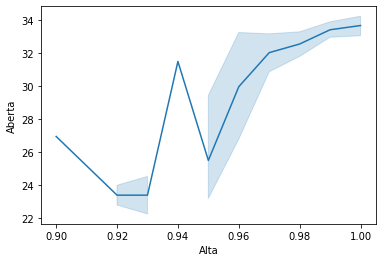

In [28]:
sns.lineplot(x="Alta", y="Aberta", data=dados)

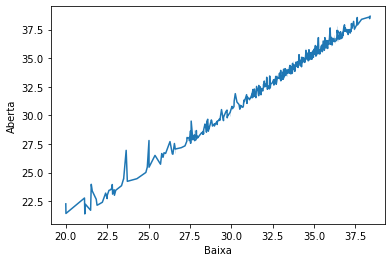

In [29]:
sns.lineplot(x="Baixa", y="Aberta", data=dados)

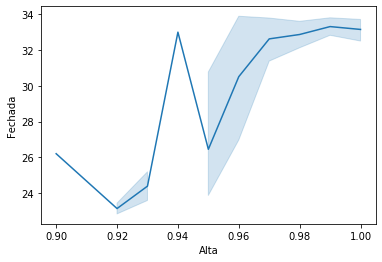

In [30]:
sns.lineplot(x="Alta", y="Fechada", data=dados)

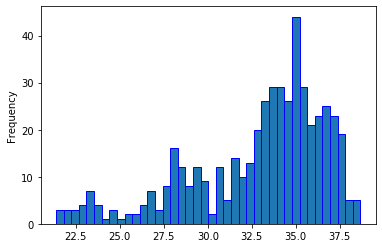

In [31]:
dados["Aberta"].plot.hist(bins=40, edgecolor="Blue")

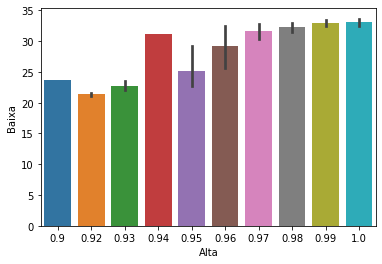

In [32]:
sns.barplot(x='Alta', y='Baixa', data=dados)

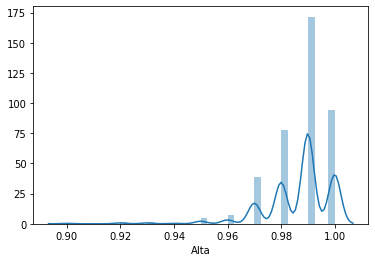

In [33]:
sns.distplot(dados["Alta"])

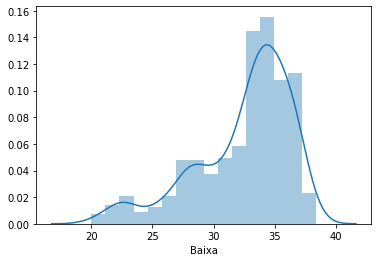

In [34]:
sns.distplot(dados["Baixa"])

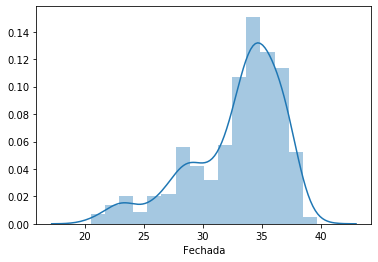

In [35]:
sns.distplot(dados["Fechada"])

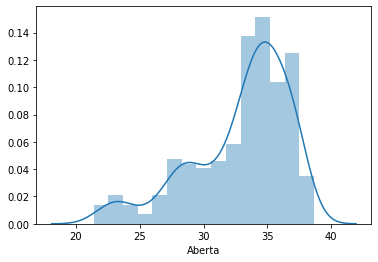

In [36]:
f1 = sns.distplot(dados["Aberta"])

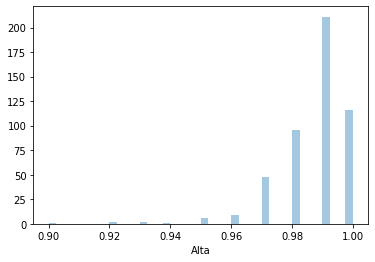

In [37]:
sns.distplot(dados["Alta"], kde=False)

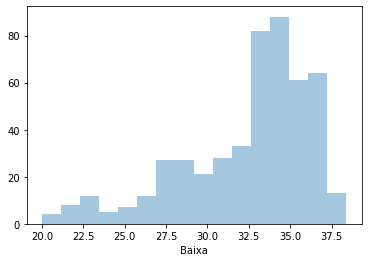

In [38]:
sns.distplot(dados["Baixa"], kde=False)

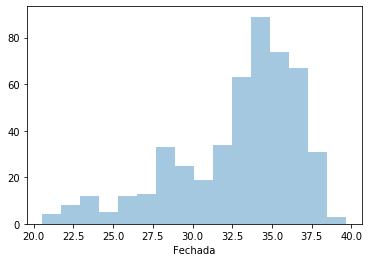

In [39]:
sns.distplot(dados["Fechada"], kde=False)

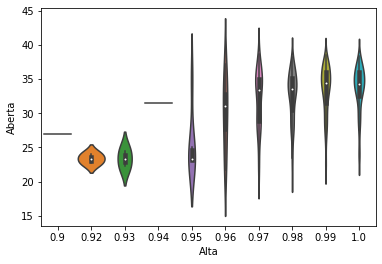

In [40]:
sns.violinplot(x="Alta", y="Aberta", data=dados)

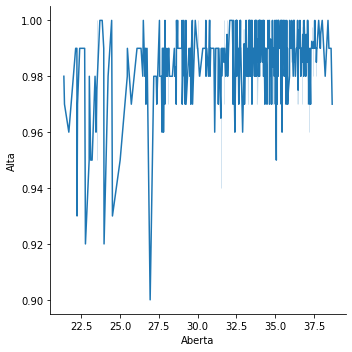

In [41]:
x1 = sns.relplot(x="Aberta", y="Alta", kind="line", data=dados)

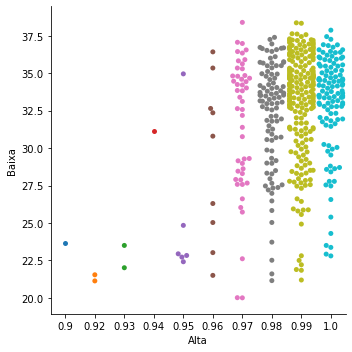

In [42]:
sns.catplot(x="Alta", y="Baixa", kind="swarm", data=dados)

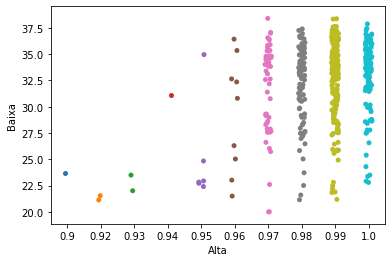

In [43]:
sns.stripplot(x="Alta", y="Baixa", data=dados)

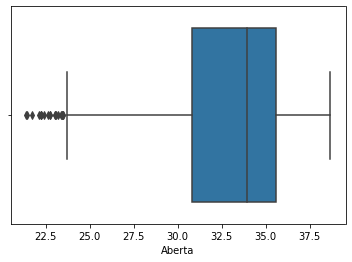

In [44]:
sns.boxplot(dados.Aberta)

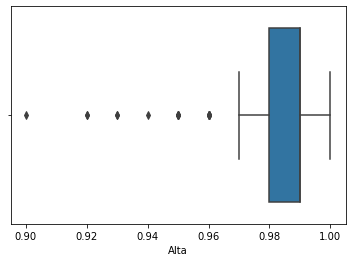

In [45]:
sns.boxplot(dados.Alta)

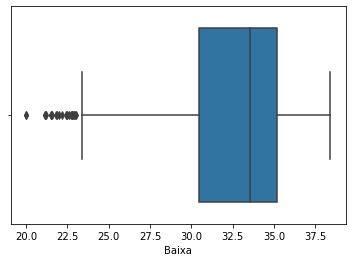

In [46]:
sns.boxplot(dados.Baixa)

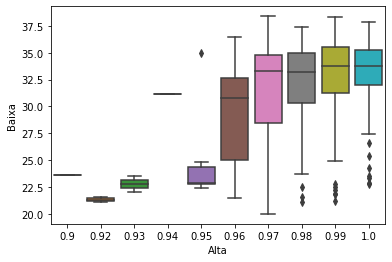

In [47]:
sns.boxplot(x="Alta", y="Baixa", data=dados)

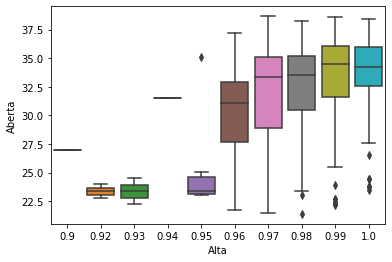

In [48]:
sns.boxplot(x="Alta", y="Aberta", data=dados)

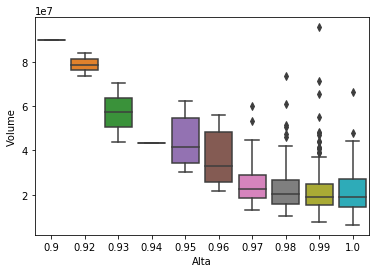

In [49]:
sns.boxplot(x="Alta", y="Volume", data=dados)

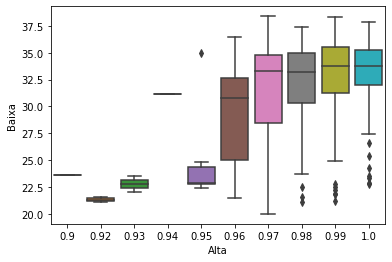

In [50]:
sns.boxplot(x="Alta", y="Baixa", data=dados)

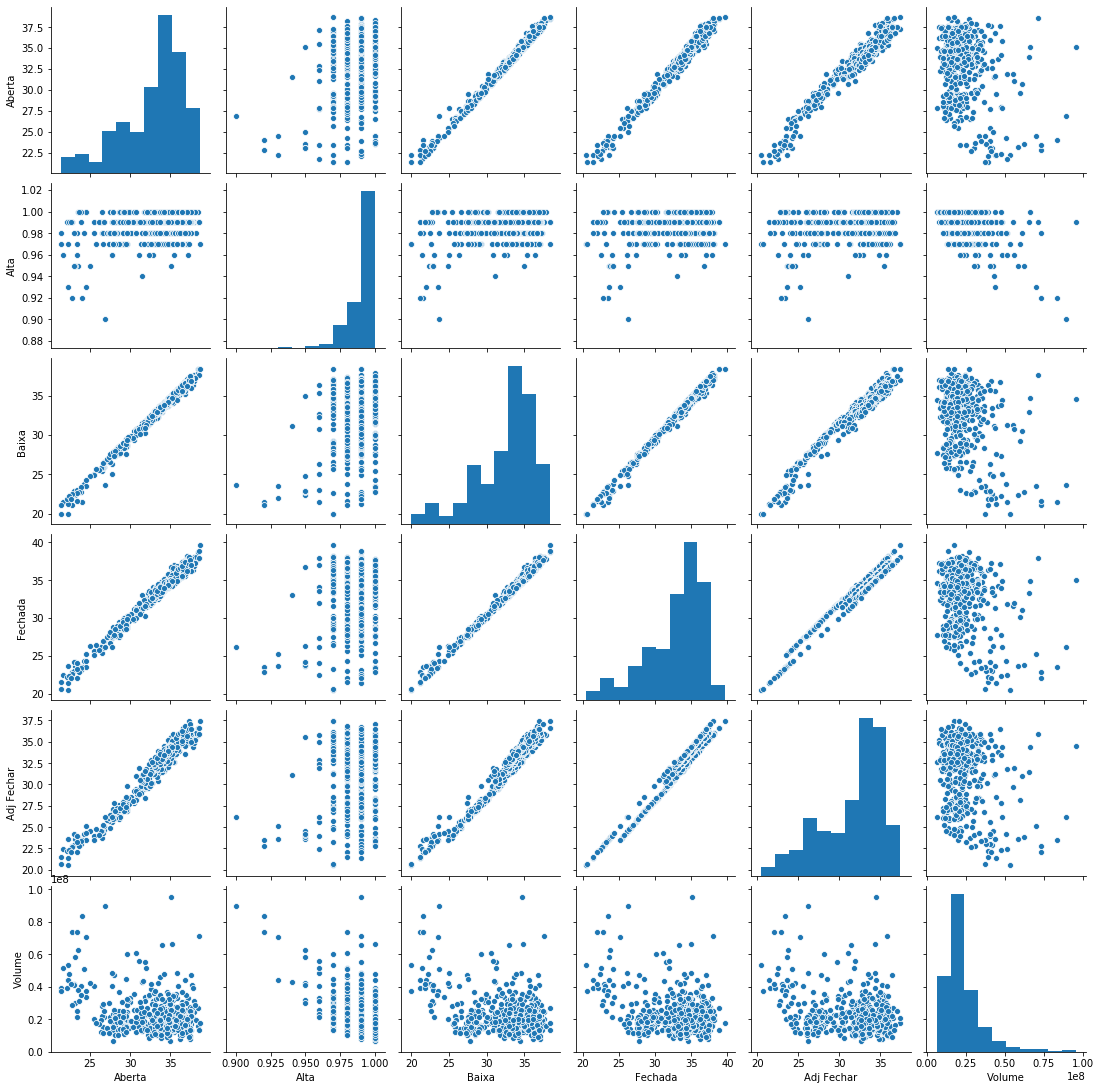

In [51]:
sns.pairplot(dados)

# Treino e teste

In [52]:
dfr.corr()

,Aberta,Alta,Baixa,Fechada,Adj Fechar,Volume
Aberta,1.000000,0.998907,0.998804,0.997548,0.970565,-0.470438
Alta,0.998907,1.000000,0.998712,0.999033,0.972322,-0.462099
Baixa,0.998804,0.998712,1.000000,0.998816,0.970425,-0.481750
Fechada,0.997548,0.999033,0.998816,1.000000,0.971668,-0.471232
Adj Fechar,0.970565,0.972322,0.970425,0.971668,1.000000,-0.427327
Volume,-0.470438,-0.462099,-0.481750,-0.471232,-0.427327,1.000000


In [53]:
from sklearn.model_selection import train_test_split

x = dfr[["Aberta", "Alta", "Baixa", "Fechada", "Adj Fechar"]]
y = dfr["Volume"]

x_trin, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [54]:
x_trin

,Aberta,Alta,Baixa,Fechada,Adj Fechar
957,8.760000,8.860000,8.746667,8.786667,8.210752
261,3.545455,3.581818,3.448485,3.490909,2.805499
470,6.733333,6.786667,6.566667,6.720000,5.593863
1008,10.010000,10.040000,9.800000,9.880000,9.246275
273,3.763636,3.951515,3.745455,3.854545,3.104138
...,...,...,...,...,...
17,7.769697,7.787879,7.569697,7.696970,5.917844
1130,9.330000,9.470000,9.190000,9.340000,8.934665
447,7.139394,7.260606,7.084848,7.151515,5.949825
1012,10.050000,10.130000,9.970000,10.110000,9.461518


In [55]:
y_train

957     13017400
261     19698600
470     36364900
1008    21363000
273     32007400
          ...   
17      17994900
1130    14731300
447     14388700
1012    17049600
881     19974900
Name: Volume, Length: 964, dtype: int64

# Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier

x1 = RandomForestClassifier(n_estimators=100)
x1.fit(x_trin, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [57]:
from sklearn.ensemble import RandomForestClassifier

x1 = RandomForestClassifier(n_estimators=100)
x1.fit(x_trin, y_train)
y_pred = x1.predict(x_test)
y_pred

array([16707400, 15911500, 14416400, 22575300, 13249500, 30181900,
        8197300, 37609200,  8935000, 16358500, 23675100, 13758000,
       37020300, 23107800, 18885500, 20860400, 27039300, 38388100,
        9065100,  9484500,  8207200, 10448200, 13068300, 49308000,
       15195400, 19529700, 20558500, 13481800, 21937200, 14550900,
       12483900, 22984300,  8207200, 17131800, 23420800, 38582900,
       13236900, 12483900, 13364400, 16575700, 17622400, 24864100,
       16380100,  9976000,  7666600, 14566900, 42625000, 29549000,
       20071500, 27982000, 13236900, 10992000, 10212900, 15920700,
       15276000, 26696700, 19698600,  8790100, 40081000, 16672300,
       13503300, 24643500, 23420800, 18038500, 20648800, 12483900,
        9944100, 16830900,  8540500, 18618600, 25931300, 32612200,
       14938300, 18836400, 19465500, 21728800, 39531900, 19357700,
       38860200, 19784100,  5465700, 13017400, 18330600, 16552100,
       31047400, 18965200, 34396500, 38199200, 48234000,  9936

# Modelo regressão linear

In [58]:
x = dfr["Alta"]
y = dfr["Baixa"]

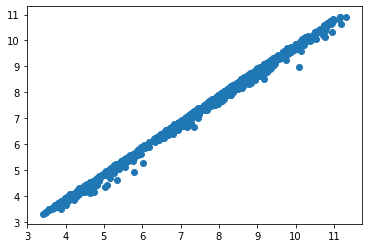

In [59]:
plt.scatter(x, y)

In [60]:
x1_alta = dfr["Alta"]
x2_baixa = dfr["Baixa"]

In [61]:
treino, teste, treino_alta, teste_baixo = train_test_split(x1_alta, x2_baixa)

In [62]:
x1_alta = np.array(x1_alta).reshape(len(x1_alta), 1)
x1_alta

array([[7.606061],
       [7.836364],
       [8.145454],
       ...,
       [5.37    ],
       [5.35    ],
       [5.1     ]])

In [63]:
x2_baixa = np.array(x2_baixa).reshape(len(x2_baixa), 1)
x2_baixa

array([[7.363636],
       [7.521212],
       [7.957576],
       ...,
       [5.09    ],
       [5.14    ],
       [4.81    ]])

In [64]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

regressor.fit(x1_alta, x2_baixa)
modelo = LinearRegression()
modelo.fit(x1_alta, x2_baixa)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [65]:
modelo.intercept_

array([-0.1362496])

In [66]:
modelo.coef_

array([[0.99120163]])

In [67]:
modelo.coef_ * 27.74456356 + modelo.intercept_

array([[27.36420694]])

**Previssãoes das ações**

In [68]:
from sklearn.linear_model import LinearRegression


pre1 = regressor.predict(x1_alta)
pre2 = regressor.predict(x2_baixa)

In [69]:
pre1

array([[7.40289044],
       [7.63116714],
       [7.93753765],
       ...,
       [5.18650313],
       [5.1666791 ],
       [4.91887869]])

In [70]:
pre2

array([[7.16259838],
       [7.31878797],
       [7.75131268],
       ...,
       [4.90896668],
       [4.95852676],
       [4.63143022]])

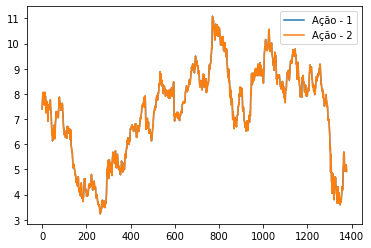

In [71]:
plt.plot(pre1, markersize = 100, label = 'Ação - 1')
plt.plot(pre1, label = 'Ação - 2')
plt.legend()

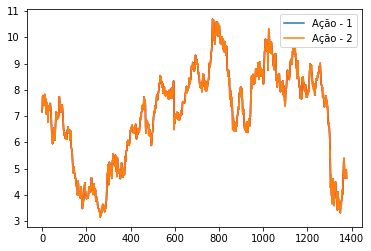

In [72]:
plt.plot(pre2, label = 'Ação - 1')
plt.plot(pre2, markersize = 10, color = 'red')
plt.plot(pre2, label = 'Ação - 2')
plt.legend()

**Grafico da regressão linear**

Text(0, 0.5, 'Ações Baixa')

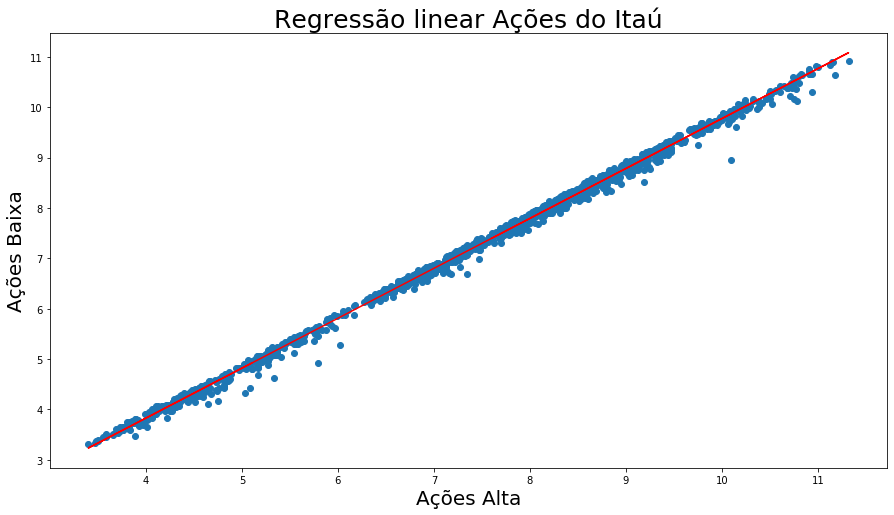

In [73]:
fig = plt.figure(figsize=(15, 8))

plt.scatter(x1_alta, x2_baixa)
plt.plot(x1_alta, regressor.predict(x1_alta), color = "red")
plt.title("Regressão linear Ações do Itaú", fontsize= 25)
plt.xlabel("Ações Alta", fontsize= 20)
plt.ylabel("Ações Baixa", fontsize= 20)

In [74]:
modelo_1 = LinearRegression()
modelo_1.fit(x1_alta, x2_baixa)

modelo_1.score(x1_alta, x2_baixa)

0.9974256505084932

# RMSE, MSE, MAE

In [80]:
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

**RMSE**

In [81]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = np.sqrt(mean_squared_error(x1_alta, x2_baixa))
print("Erro quadrático média da raiz:", rmse)

Erro quadrático média da raiz: 0.22287136502504695


**MAE**

In [82]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(x1_alta, x2_baixa)
print("Erro médio absoluto:", mae)

Erro médio absoluto: 0.20203656313497823


**MSE**

In [77]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(x1_alta, x2_baixa)
print("Erro médio quadrático:", mse)

Erro médio quadrático: 0.04967164534812772


**Previsão dadas ações**

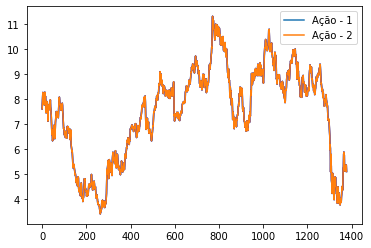

In [78]:
plt.plot(x1_alta, label = 'Ação - 1')
plt.plot(x1_alta, markersize = 10, color = 'blue')
plt.plot(x1_alta, label = 'Ação - 2')
plt.legend()

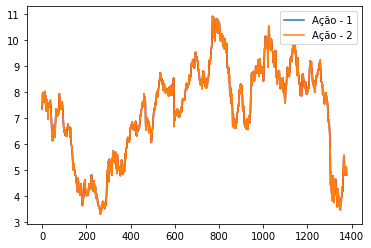

In [79]:
plt.plot(x2_baixa, label = 'Ação - 1')
plt.plot(x2_baixa, markersize = 10, color = 'red')
plt.plot(x2_baixa, label = 'Ação - 2')
plt.legend()